In [3]:
import pandas as pd 
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [5]:
df = pd.read_csv('NewDatasets/CustomerTourism.csv')
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0


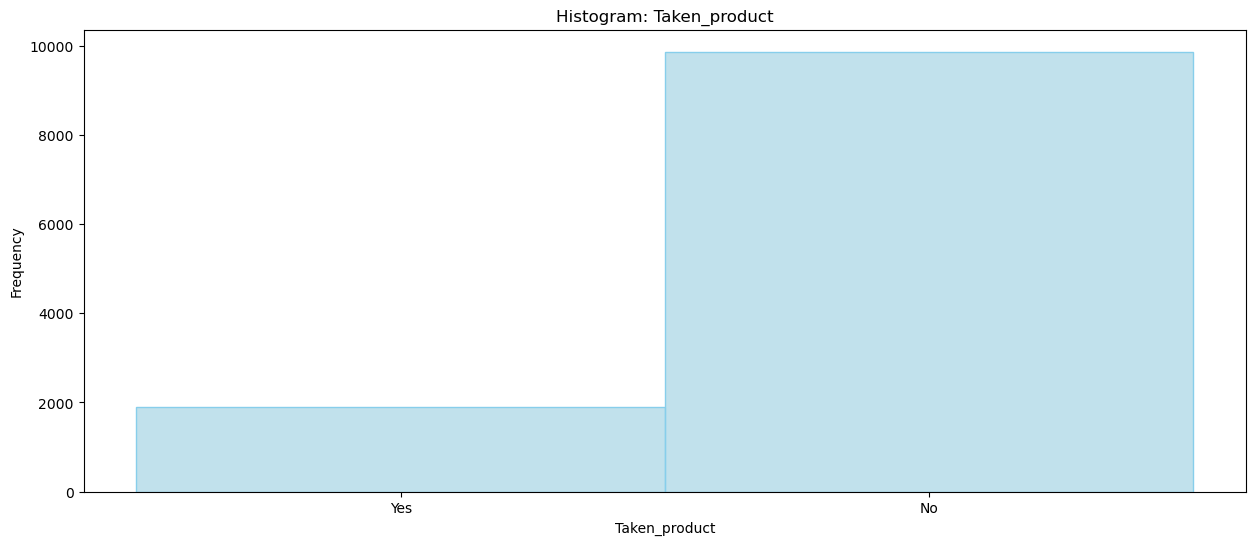

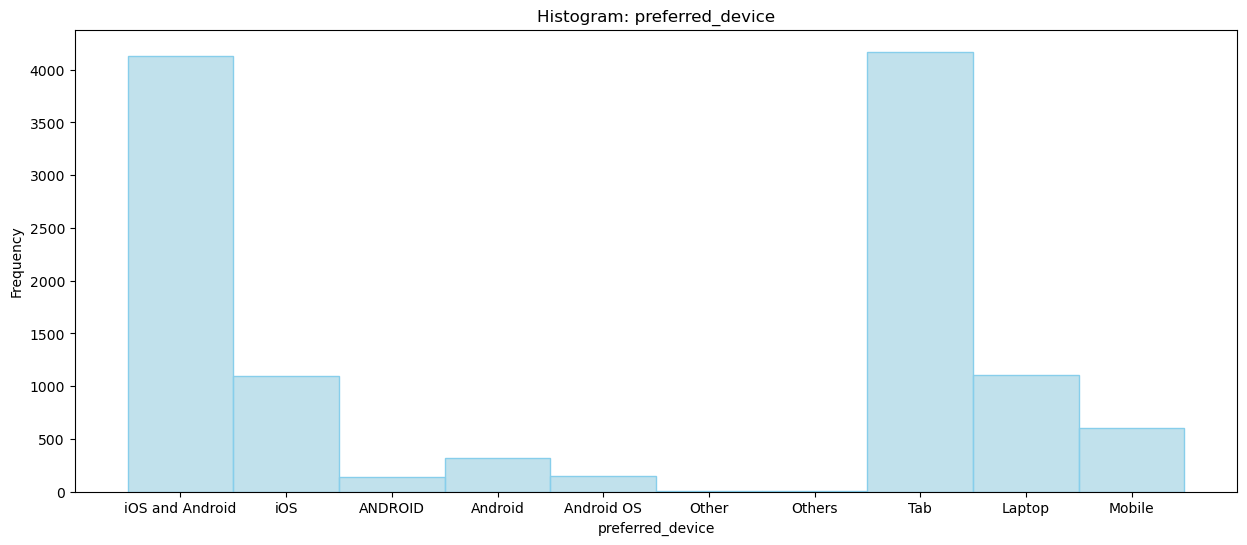

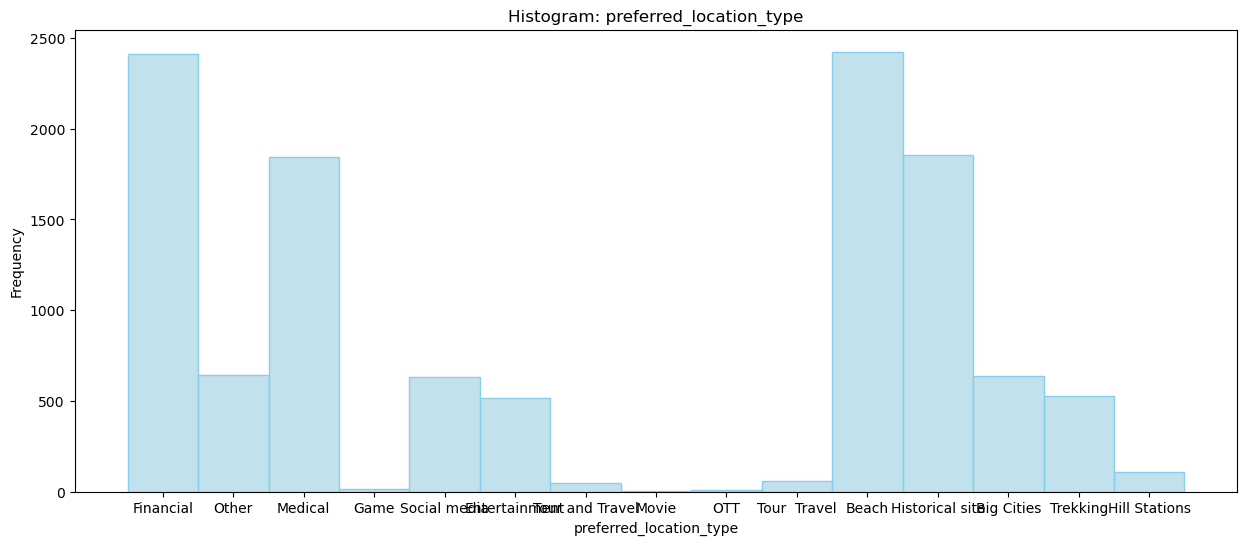

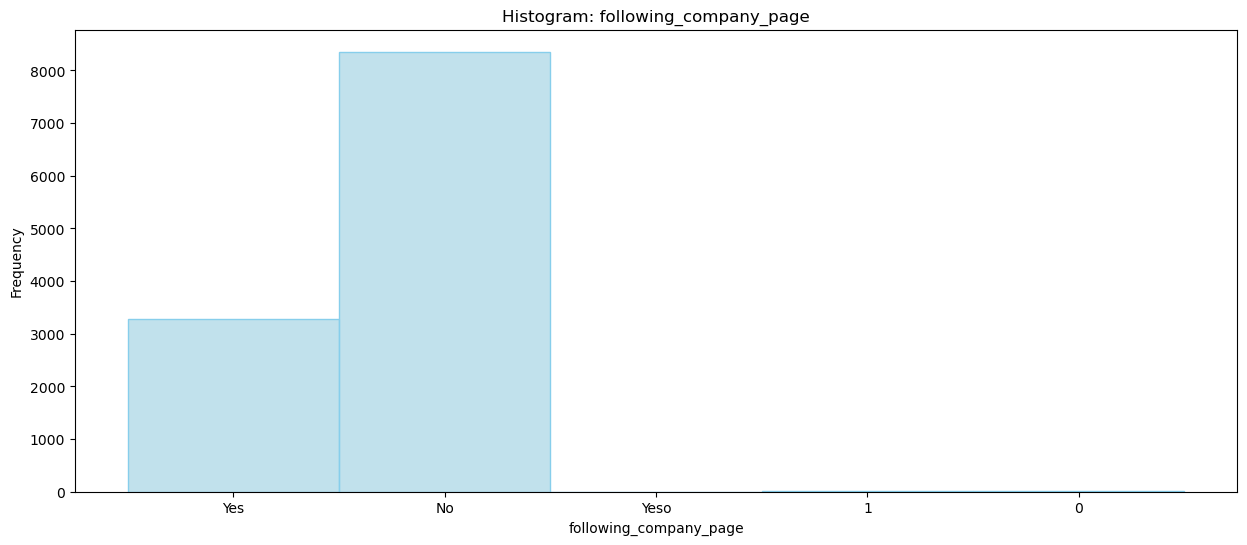

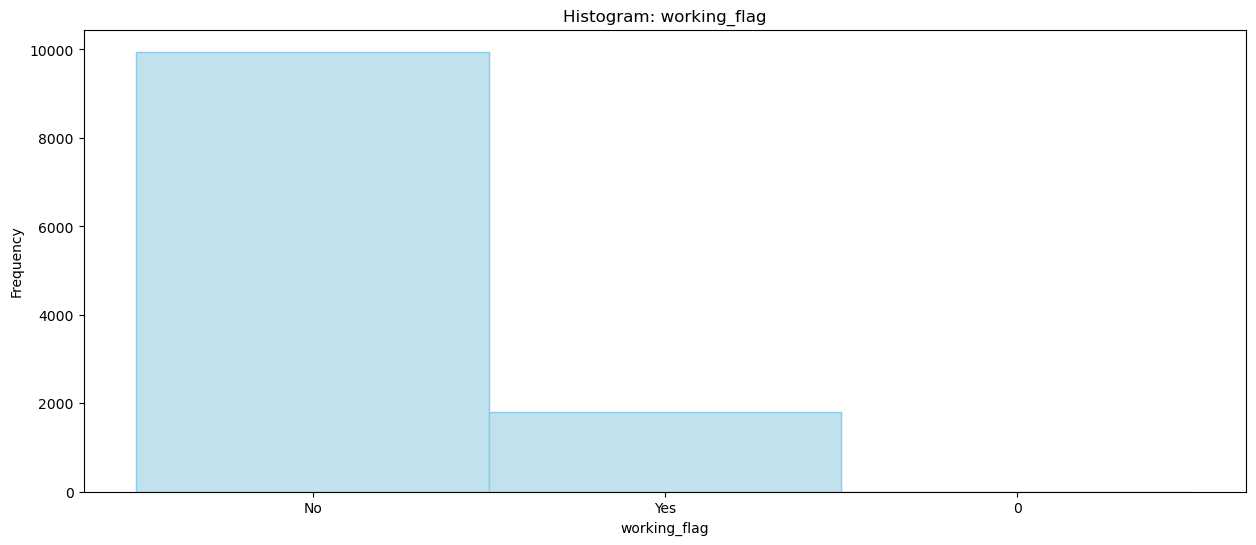

In [13]:
string_important_columns = ['Taken_product', 'preferred_device','preferred_location_type',
                            'following_company_page','working_flag']
for column in string_important_columns:
    plt.figure(figsize=(15, 6))
    sns.histplot(df[column], bins=20, kde=False, color='lightblue', edgecolor='skyBlue')  # You can adjust the number of bins as needed

    plt.title('Histogram: ' + column)
    
    plt.xlabel(column)
    
    plt.ylabel('Frequency')

    plt.show()



In [14]:
df['Taken_product'].describe()

count     11760
unique        2
top          No
freq       9864
Name: Taken_product, dtype: object

In [17]:
columns_to_encode = ['Taken_product', 'preferred_device', 'preferred_location_type', 
                     'following_company_page', 'working_flag']

lebel_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = lebel_encoder.fit_transform((df[column]))
    
df.head(5)

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,1,307.0,9,38570.0,1,2,3,94.0,5993,8,3,11,1,1,0.0,8.0
1,1000002,0,367.0,8,9765.0,1,1,3,61.0,5130,1,2,23,2,4,1.0,10.0
2,1000003,1,277.0,9,48055.0,1,2,10,92.0,2090,6,3,15,1,2,0.0,7.0
3,1000004,0,247.0,8,48720.0,1,4,3,56.0,2909,1,3,11,1,3,0.0,8.0
4,1000005,0,202.0,9,20685.0,1,1,7,40.0,3468,9,2,12,1,4,1.0,6.0


In [20]:
df['preferred_location_type'].unique()

array([ 3, 10,  7, 15,  4, 11,  2, 13,  8,  9, 12,  0,  6,  1, 14,  5])

In [22]:
df.fillna(df.mode().iloc[0], inplace=True)
df.drop('UserID', axis=1, inplace=True)


In [24]:
df.replace('*', float('nan'), inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.mean(), inplace=True)


In [29]:
X = df.drop('Taken_product', axis=1)
Y = df['Taken_product']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set shape - X:", X_train.shape, "y:", y_train.shape)
print("Test set shape - X:", X_test.shape, "y:", y_test.shape)


Train set shape - X: (9408, 15) y: (9408,)
Test set shape - X: (2352, 15) y: (2352,)


In [31]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])
cv_scores = cross_val_score(rf_model, X_combined, y_combined, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
rf_model.fit(X_combined, y_combined)
rf_predictions = rf_model.predict(X_test)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))


Cross-Validation Scores: [0.98767007 0.98341837 0.98171769 0.99022109 0.98767007]
Mean CV Accuracy: 0.9861394557823129

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1958
           1       1.00      1.00      1.00       394

    accuracy                           1.00      2352
   macro avg       1.00      1.00      1.00      2352
weighted avg       1.00      1.00      1.00      2352



In [33]:
from xgboost import XGBClassifier

# xgb_model = XGBClassifier(random_state=42)
# xgb_model.fit(X_train, y_train)
# xgb_predictions = xgb_model.predict(X_test)

# xgb_accuracy = accuracy_score(y_test, xgb_predictions)
# print("\nXGBoost Accuracy:", xgb_accuracy)
# print("XGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))

ModuleNotFoundError: No module named 'xgboost'